## **Exploratory Data Analysis - Celebal**

### **Importing Libraries**

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### **Data Preparation**

In [184]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head(2) 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [185]:
data.tail(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [186]:
data = data.drop(['car_ID','symboling'],axis=True)

In [187]:
#checking the shape of the dataset
data.shape

(205, 24)

In [188]:
#checking info of the datatset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [189]:
#getting the column names of the dataset
data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [190]:
#describing various parameters of the columns
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [191]:
#selecting and counting numeric data types
numeric_data = data.select_dtypes(include=np.number)
len(numeric_data.columns)

14

In [192]:
#counting missing values a column contains and arranging it in descending order
missing_values = data.isna().sum().sort_values(ascending=False)
missing_values

CarName             0
fueltype            0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
price               0
dtype: int64

In [193]:
#plt.figure(figsize=(10,5))
#missing_values.plot.bar()

In [194]:
#plt.figure(figsize=(10,5))
#missing_values[missing_values!=0].plot.bar()

### **Exploratory Data Analysis and Visualisation** 

1. Car Distribution

In [195]:
data[['CarName']]

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


In [196]:
car_name = data['CarName'].unique()
len(car_name)

147

In [197]:
car_counts = data['CarName'].value_counts().sort_values(ascending=False)
car_counts

toyota corona          6
toyota corolla         6
peugeot 504            6
subaru dl              4
mitsubishi g4          3
                      ..
porsche boxter         1
dodge challenger se    1
bmw x5                 1
nissan fuga            1
nissan leaf            1
Name: CarName, Length: 147, dtype: int64

<AxesSubplot:>

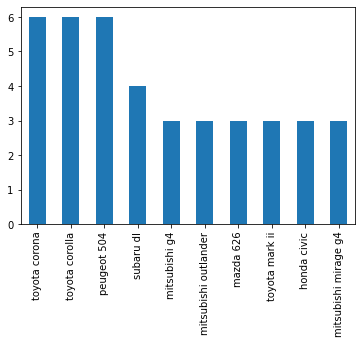

In [198]:
car_counts[:10].plot(kind='bar')

In [199]:
pd.DataFrame(data['CarName'].value_counts()).reset_index()

,index,CarName
0,toyota corona,6
1,peugeot 504,6
2,toyota corolla,6
3,subaru dl,4
4,mitsubishi g4,3
...,...,...
142,dodge coronet custom (sw),1
143,toyota corolla 1600 (sw),1
144,honda civic (auto),1
145,buick opel isuzu deluxe,1


In [200]:
car_namewise = pd.DataFrame(data['CarName'].value_counts().sort_values(ascending=False)).reset_index().rename(columns={'index':'CarName','CarName':'Count'})
car_namewise

,CarName,Count
0,toyota corona,6
1,toyota corolla,6
2,peugeot 504,6
3,subaru dl,4
4,mitsubishi g4,3
...,...,...
142,porsche boxter,1
143,dodge challenger se,1
144,bmw x5,1
145,nissan fuga,1


In [201]:
top_10_cars = car_namewise[:10]
top_10_cars

,CarName,Count
0,toyota corona,6
1,toyota corolla,6
2,peugeot 504,6
3,subaru dl,4
4,mitsubishi g4,3
5,mitsubishi outlander,3
6,mazda 626,3
7,toyota mark ii,3
8,honda civic,3
9,mitsubishi mirage g4,3


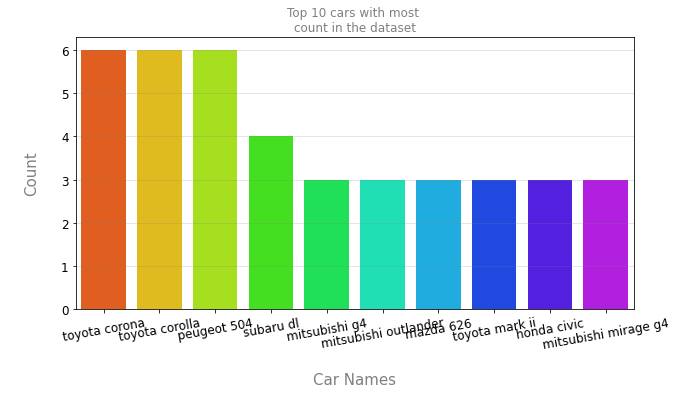

In [202]:
# Let us try more beautiful bar plot

fig, ax = plt.subplots(figsize = (10,5))
ax=sn.barplot(y=top_10_cars['Count'], x=top_10_cars['CarName'], palette='gist_rainbow')
total = sum(car_namewise['Count'])
#for i in ax.patches:
    #ax.text(i.get_x()+0.2,i.get_height()-6500,str(round(i.get_height()/total*100,2))+'%')

# title, ticks and labels
plt.title('Top 10 cars with most \ncount in the dataset',color='grey')
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCar Names\n', fontsize=15, color='grey')
ax.set_ylabel('\nCount\n', fontsize=15, color='grey')

ax.grid(color='grey', linewidth=1, axis='y', alpha=.2)

plt.show()

In [203]:
data['CarName'][data['horsepower']>=100]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 94, dtype: object

In [204]:
car_horsepower = data[(data['CarName'] == 'toyota corona') & (data['horsepower']>=100)]
num_car_horsepower = len(car_horsepower)

print("Number of cars of toyota corona with horsepower 100 or greater : ", num_car_horsepower)

Number of cars of toyota corona with horsepower 100 or greater :  1


In [205]:
car_horsepower = data[(data['CarName'] == 'toyota corona') & (data['horsepower']>=50)]
num_car_horsepower = len(car_horsepower)

print("Number of cars of toyota corona with horsepower 50 or greater : ", num_car_horsepower)

Number of cars of toyota corona with horsepower 50 or greater :  6


In [206]:
# Count the number of diesel and gas cars
diesel_count = data[data['fueltype'] == 'diesel'].shape[0]
gas_count = data[data['fueltype'] == 'gas'].shape[0]

# Display the counts
print("Number of Diesel Cars:", diesel_count)
print("Number of Gas Cars:", gas_count)

Number of Diesel Cars: 20
Number of Gas Cars: 185


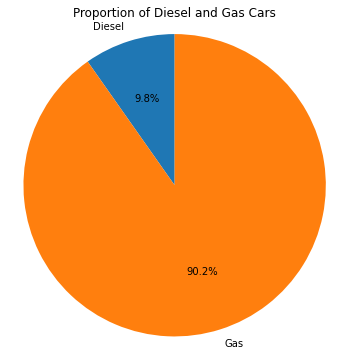

In [207]:
# Create a pie chart of fuel type counts
labels = ['Diesel', 'Gas']
counts = [diesel_count, gas_count]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diesel and Gas Cars')
plt.axis('equal')
plt.show()

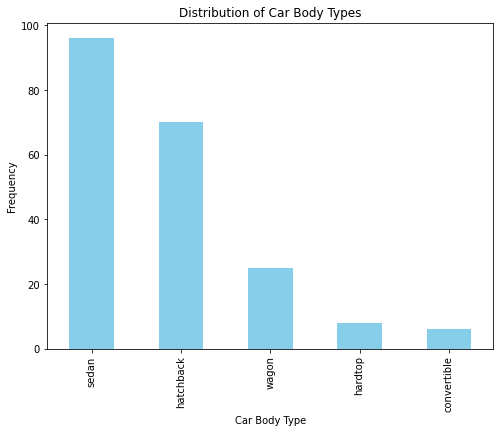

In [208]:
# Count the occurrences of each car body type
body_type_counts = data['carbody'].value_counts()

# Create a bar plot of car body types
plt.figure(figsize=(8, 6))
body_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Car Body Type')
plt.ylabel('Frequency')
plt.title('Distribution of Car Body Types')
plt.show()

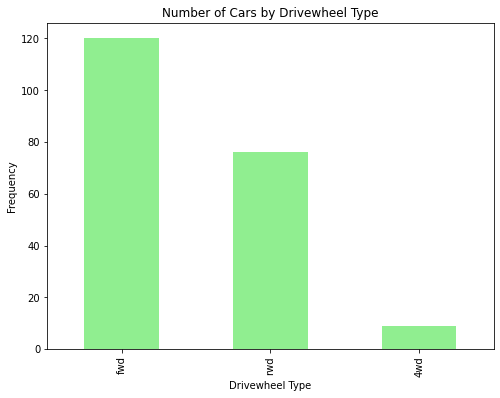

In [209]:
# Count the occurrences of each drivewheel type
drivewheel_counts = data['drivewheel'].value_counts()

# Create a bar plot of drivewheel types
plt.figure(figsize=(8, 6))
drivewheel_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Drivewheel Type')
plt.ylabel('Frequency')
plt.title('Number of Cars by Drivewheel Type')
plt.show()

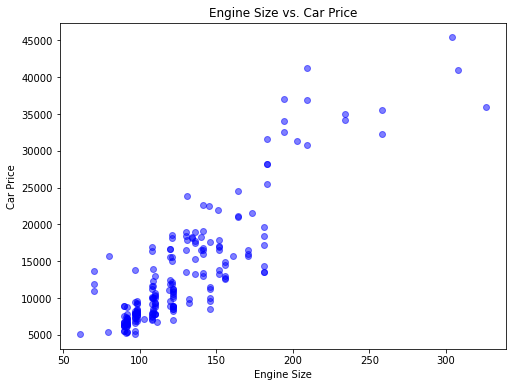

In [210]:
# Create a scatter plot of engine size vs. car price
plt.figure(figsize=(8, 6))
plt.scatter(data['enginesize'], data['price'], color='blue', alpha=0.5)
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs. Car Price')
plt.show()

<Figure size 576x432 with 0 Axes>

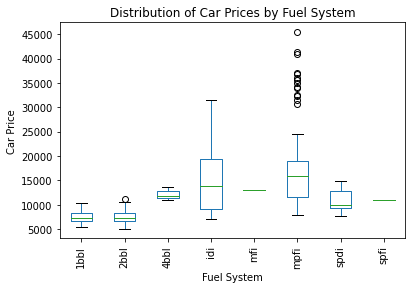

In [211]:
# Create a box plot of car prices for each fuel system
plt.figure(figsize=(8, 6))
data.boxplot(column='price', by='fuelsystem', grid=False)
plt.xlabel('Fuel System')
plt.ylabel('Car Price')
plt.title('Distribution of Car Prices by Fuel System')
plt.suptitle('')  # Remove the default title added by pandas
plt.xticks(rotation=90)
plt.show()

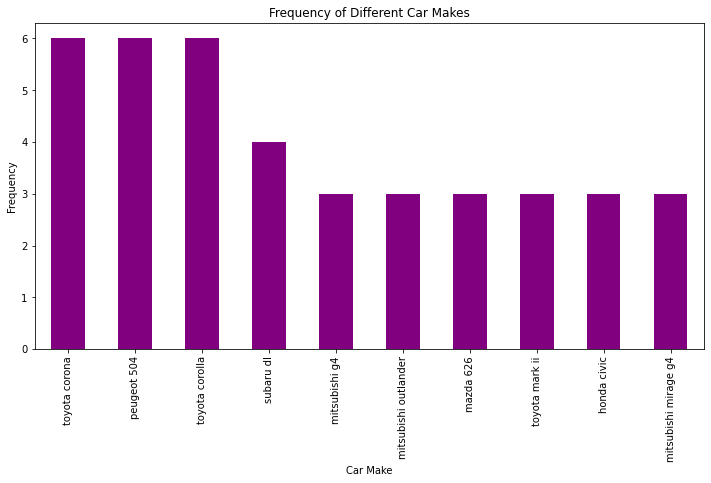

In [212]:
# Count the occurrences of each car make
car_make_counts = data['CarName'].value_counts()
num_car_make = car_make_counts[:10]
# Create a bar plot of car makes
plt.figure(figsize=(12, 6))
num_car_make.plot(kind='bar', color='purple')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.title('Frequency of Different Car Makes')
plt.xticks(rotation=90)
plt.show()

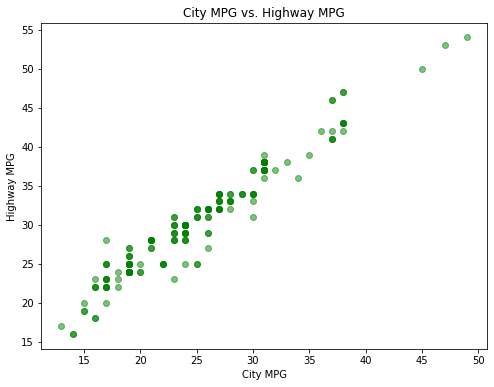

In [213]:
# Create a scatter plot of City MPG vs. Highway MPG
plt.figure(figsize=(8, 6))
plt.scatter(data['citympg'], data['highwaympg'], color='green', alpha=0.5)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('City MPG vs. Highway MPG')
plt.show()

<Figure size 576x432 with 0 Axes>

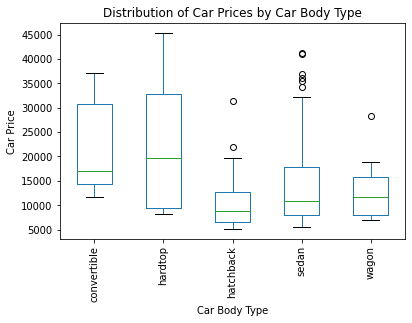

In [214]:
# Create a box plot of car prices by car body type
plt.figure(figsize=(8, 6))
data.boxplot(column='price', by='carbody', grid=False)
plt.xlabel('Car Body Type')
plt.ylabel('Car Price')
plt.title('Distribution of Car Prices by Car Body Type')
plt.suptitle('')  # Remove the default title added by pandas
plt.xticks(rotation=90)
plt.show()